# HW3 : Neural Networks and Stochastic Gradient Descent

This is the starter notebook for HW3.

### Instructions

The authoritative HW3 instructions are on the course Piazza.

Please report any questions to Piazza.

We've tried to make random seeds set explicitly so you can reproduce these exact results, but remember that some differences across platforms might occur, so the exact count of how many runs "converge" or not may not be precise (though hopefully in the same ballpark).

### Outline of this Notebook


* [Problem 1: How many hidden units?](#part1)
* [Problem 2: What batch size and learning rate?](#part2)

In [51]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier
import sklearn.metrics

In [52]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [53]:
# Used for some bonus visualizations

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

# Load the "Flower XOR" dataset


10,000 labeled examples in training set

Each example has 2 features ($x_{n1}, x_{n2}$)

Each label is binary (0 or 1)

In [54]:
DATA_DIR = "./data_flower" # TODO fix to path on your local system

In [55]:
# Load training data
x_tr_N2 = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), skiprows=1, delimiter=',')
y_tr_N = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), skiprows=1, delimiter=',')

# Load test data
x_te_T2 = np.loadtxt(os.path.join(DATA_DIR, 'x_test.csv'), skiprows=1, delimiter=',')
y_te_T = np.loadtxt(os.path.join(DATA_DIR, 'y_test.csv'), skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_T2.shape[0] == y_te_T.shape[0]

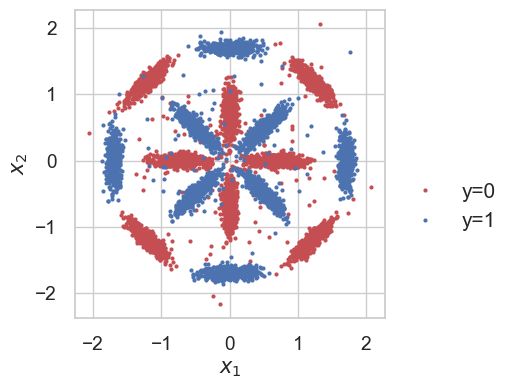

In [56]:
fig, _ = plt.subplots(figsize=(4,4));
plt.plot(x_tr_N2[y_tr_N == 0,0], x_tr_N2[y_tr_N == 0,1], 'r.', label='y=0');
plt.plot(x_tr_N2[y_tr_N == 1,0], x_tr_N2[y_tr_N == 1,1], 'b.', label='y=1');
plt.legend(bbox_to_anchor=[1.0, 0.5], fontsize=15);
plt.xlabel(r'$x_1$'); plt.ylabel(r'$x_2$');

# Problem 1: What model size is best?

Let's train an MLP at each of several different sizes.

We'll try multiple runs of the optimizer, to see what the impact of different random initializations of parameters is.

In [57]:
size_list = [4, 16, 64, 256]
n_runs = 4

S = len(size_list)

tr_loss_arr = 0.11 * np.ones((S, n_runs)) # Pre allocate with arbitrary values, just so code doesnt break
te_loss_arr = 0.22 * np.ones((S, n_runs))

tr_err_arr = 0.08 * np.ones((S, n_runs))
te_err_arr = 0.13 * np.ones((S, n_runs))

In [61]:
import pandas as pd

# Create a dictionary to store performance data
performance_data = {
    'Size': [],
    'Run': [],
    'Train Log Loss': [],
    'Test Log Loss': [],
    'Train Error Rate': [],
    'Test Error Rate': []
}

# Loop over different sizes and runs to collect performance data
for i, size in enumerate(size_list):
    for run_id in range(n_runs):
        start_time_sec = time.time()
        mlp = MLPClassifier(
            hidden_layer_sizes=[size],
            activation='relu',
            alpha=0.0001,
            tol=1e-5,
            max_iter=max_iter_per_run,
            random_state=run_id,  # Use run_id as random_state
            solver='sgd', batch_size=500,
            learning_rate_init=0.2,
            momentum=0
        )
        with warnings.catch_warnings(record=True) as warn_list:
            mlp.fit(x_tr_N2, y_tr_N)
        elapsed_time_sec = time.time() - start_time_sec
        mlp.did_converge = True if len(warn_list) == 0 else False

        # Compute performance metrics
        tr_log_loss = sklearn.metrics.log_loss(y_tr_N, mlp.predict_proba(x_tr_N2)) / np.log(2)
        te_log_loss = sklearn.metrics.log_loss(y_te_T, mlp.predict_proba(x_te_T2)) / np.log(2)
        tr_err = sklearn.metrics.zero_one_loss(y_tr_N, mlp.predict(x_tr_N2))
        te_err = sklearn.metrics.zero_one_loss(y_te_T, mlp.predict(x_te_T2))

        # Store performance data
        performance_data['Size'].append(size)
        performance_data['Run'].append(run_id + 1)
        performance_data['Train Log Loss'].append(tr_log_loss)
        performance_data['Test Log Loss'].append(te_log_loss)
        performance_data['Train Error Rate'].append(tr_err)
        performance_data['Test Error Rate'].append(te_err)

        tr_loss_arr[i, run_id] = tr_log_loss
        te_loss_arr[i, run_id] = te_log_loss
        tr_err_arr[i, run_id] = tr_err
        te_err_arr[i, run_id] = te_err

        print(
            f'layer_sizes {size}: run {run_id + 1}/{n_runs} done after {elapsed_time_sec:.1f} sec | '
            f'{"yes converged" if mlp.did_converge else "NOT converged"} after {max_iter_per_run} iter | '
            f'tr err {tr_err:.3f} | te err {te_err:.3f}'
        )

# Create a DataFrame from the performance data
df = pd.DataFrame(performance_data)

# Display the DataFrame
print(df)

# Calculate standard deviations for test performances over multiple runs
std_dev_test_log_loss = df.groupby('Size')['Test Log Loss'].std()
std_dev_test_err = df.groupby('Size')['Test Error Rate'].std()

# Display standard deviations
print("\nStandard Deviation of Test Log Loss:")
print(std_dev_test_log_loss)
print("\nStandard Deviation of Test Error Rate:")
print(std_dev_test_err)


layer_sizes 4: run 1/4 done after 0.8 sec | yes converged after 500 iter | tr err 0.447 | te err 0.445
layer_sizes 4: run 2/4 done after 0.9 sec | yes converged after 500 iter | tr err 0.355 | te err 0.356
layer_sizes 4: run 3/4 done after 0.7 sec | yes converged after 500 iter | tr err 0.449 | te err 0.446
layer_sizes 4: run 4/4 done after 1.7 sec | yes converged after 500 iter | tr err 0.293 | te err 0.297
layer_sizes 16: run 1/4 done after 0.7 sec | yes converged after 500 iter | tr err 0.183 | te err 0.181
layer_sizes 16: run 2/4 done after 0.6 sec | yes converged after 500 iter | tr err 0.131 | te err 0.129
layer_sizes 16: run 3/4 done after 0.4 sec | yes converged after 500 iter | tr err 0.183 | te err 0.185
layer_sizes 16: run 4/4 done after 1.4 sec | yes converged after 500 iter | tr err 0.111 | te err 0.114
layer_sizes 64: run 1/4 done after 4.8 sec | NOT converged after 500 iter | tr err 0.027 | te err 0.027
layer_sizes 64: run 2/4 done after 3.5 sec | yes converged after 500

## For fun and understanding, visualize the latest run's learned MLP

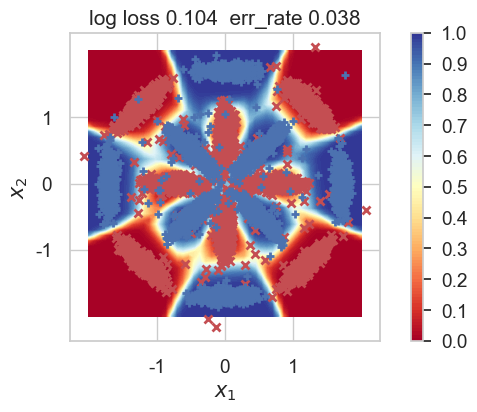

In [59]:
fig, ax_handle = plt.subplots(nrows=1, ncols=1, figsize=(4, 4));
plot_pretty_probabilities_for_clf(mlp, x_tr_N2, y_tr_N, ax=ax_handle, do_show_colorbar=True);
plt.xlabel(r'$x_1$'); plt.ylabel(r'$x_2$');

## Figure 1 (left): Log loss vs size

TODO if you've filled in the `tr_loss_arr` and `te_loss_arr` correctly so it has shape (S,R) with S sizes and R runs, this code should make a nice plot for you.

Each dot in the plot represents one completed run of the optimizer from a random initialization.


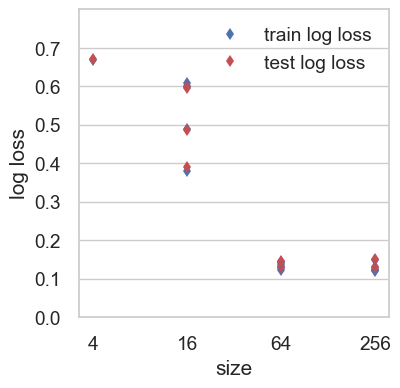

In [62]:
fig, loss_ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)

for run_id in range(n_runs):
    tr_label = 'train log loss' if run_id == 0 else ''
    te_label = 'test log loss' if run_id == 0 else ''
    
    loss_ax.plot(np.log2(size_list), tr_loss_arr[:,run_id], 'bd', label=tr_label)
    loss_ax.plot(np.log2(size_list), te_loss_arr[:,run_id], 'rd', label=te_label)

loss_ax.set_xticks(np.log2(size_list));
loss_ax.set_xticklabels(size_list);
loss_ax.xaxis.grid(False);

loss_ax.set_ylim([0, 0.8]); # Don't touch this please
loss_ax.set_yticks(np.arange(0, 0.8, 0.1));

loss_ax.set_ylabel('log loss');
loss_ax.set_xlabel('size');
loss_ax.legend(loc='upper right');

## Figure 1 (right): Error vs size

TODO if you've filled in the `tr_err_arr` and `te_err_arr` correctly so it has shape (S,R) with S sizes and R runs, this code should make a nice plot for you.


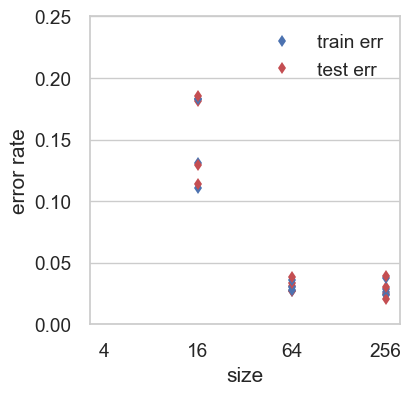

In [63]:
fig, err_ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)

for run_id in range(n_runs):
    tr_label = 'train err' if run_id == 0 else ''
    te_label = 'test err' if run_id == 0 else ''
    
    err_ax.plot(np.log2(size_list), tr_err_arr[:,run_id], 'bd', label=tr_label)
    err_ax.plot(np.log2(size_list), te_err_arr[:,run_id], 'rd', label=te_label)

err_ax.set_xticks(np.log2(size_list));
err_ax.set_xticklabels(size_list);
err_ax.xaxis.grid(False);

err_ax.set_ylim([0, 0.25]); # Don't touch this please

err_ax.set_ylabel('error rate');
err_ax.set_xlabel('size');
err_ax.legend(loc='upper right');

# Setup for Problem 2

Helper code for plotting training loss as more data is seen.

The second argument 'x' can be adjusted by user so you plot loss versus *time* or loss versus *epochs*

In [35]:
def pretty_plot_loss_curve_vs_x(mlp_list_by_lr, x='elapsed_time_sec', xlim_max=65, ylim_max=0.5):
    ''' Create pretty plot of loss as more data is seen.

    Args
    ----
    mlp_list_by_lr : dict of lists
        Each key is a learning rate.
        Each value is a list of MLPClassifier objects
    x : str
        Either 'elapsed_time_sec' or 'epoch'
        
    Post Condition
    --------------
    Creates new matplotlib figure and plots a line:
    * loss on y-axis
    * the specified x variable on x-axis
    '''

    ncols = len(mlp_list_by_lr)
    fig, ax = plt.subplots(
        nrows=1, ncols=ncols, figsize=(ncols*4, 4),
        squeeze=False,
        sharex=True, sharey=True)
    ax = ax.flatten()
    for ii, (lr, mlp_list) in enumerate(mlp_list_by_lr.items()):
        for mlp in mlp_list:
            if x.count("time"):
                ax[ii].plot(
                    mlp.elapsed_time_sec_ * np.linspace(1.0/mlp.n_iter_, 1.0, mlp.n_iter_),
                    mlp.loss_curve_ / np.log(2.0), '-')
                ax[ii].set_xlabel('elapsed time (sec)');
            else:
                ax[ii].plot(
                    np.arange(mlp.n_iter_),
                    mlp.loss_curve_ / np.log(2.0), '-')
                ax[ii].set_xlabel('epochs completed');

        ax[ii].set_title('lr %.3f \n batch_size %d' % (lr, mlp.batch_size))

        if ii == 0:
            ax[ii].set_ylabel('log loss');
        ax[ii].set_ylim([0.0, ylim_max]);
        ax[ii].set_xlim([0.0, xlim_max]);

# Problem 2: MLP with SGD : Which batch size and learning rate is best?

This problem requires you to *interpret* a provided plot.

No coding required! 

See the HW3 Piazza post!


### Goal of this problem: Can we become more scalable with SGD?

There are N=10000 training examples in our training set. Can we use SGD to train our model faster?

We'll fix our model size to 64 hidden units.

Let's try out classic "sgd" (stochastic gradient descent), at a few different batch sizes and learning rates.

Remember, what happens in SGD is given by the pseudocode in the Piazza post.

### Vocabulary: What is an iteration in SGD?

Sometimes this word means different things in different contexts. We'll focus on what it means using sklearn's implementation.

Each *iteration* (also called an *epoch*) represents one or more gradient computation and parameter update steps (see pseudocode above).

Each iteration is complete when the number of examples it has ``seen'' (and used for updates) is equal to (or slightly bigger than) the total number examples in the entire training dataset. This number is denoted as N in our code above.

Thus, the number of parameter updates that happen per iteration depends on the `batch_size`.

# Problem 3: MLP with SGD : Your own re-implementation

Can you reproduce the figure you analyzed in Problem 2?


## Reproduce Figure 2 step 1: Try with batch_size = 10000 (each batch sees 100% of the dataset)

We expect each separate "run" will take between 1-3 minutes.

We want you to try at least 2 runs at each of 4 learning rates.

So this block may take ~10-20 minutes to run.

In [36]:
layer_sizes = [16] # TODO FIXME. See instructions
n_runs = 2         # TODO FIXME
lr_list = [0.10, 0.30, 0.90, 2.70]   # TODO FIXME

In [66]:
batch_size = 10000
max_iter_per_run = 8000 # Don't touch. Has been set so wallclock times are comparable.

mlp_list_by_lr_10000 = dict()

for lr in lr_list:
    mlp_list_by_lr_10000[lr] = list()
        
    for run_id, random_state in enumerate(range(n_runs)):

        start_time_sec = time.time()
        mlp = MLPClassifier(
            hidden_layer_sizes=layer_sizes,
            activation='relu',
            alpha=0.0001,
            random_state=random_state, # controls random init of weights
            max_iter=max_iter_per_run,
            solver='sgd',
            batch_size=batch_size,
            learning_rate='adaptive', learning_rate_init=lr, momentum=0.0,
            tol=1e-5,
            n_iter_no_change=50,
            )
        with warnings.catch_warnings(record=True) as warn_list:
            mlp.fit(x_tr_N2, y_tr_N)
        mlp.elapsed_time_sec_ = time.time() - start_time_sec
        mlp.n_epoch_ = len(mlp.loss_curve_)
        mlp.did_converge = True if len(warn_list) == 0 else False

        # Add to the list
        mlp_list_by_lr_10000[lr].append(mlp)
        
        # Pretty print summary of this run
        msg = 'finished run %2d/%d after %5.1f sec | %13s after %4d iter | tr loss % .3f | lr = %.3f' % (
            run_id + 1, n_runs,
            mlp.elapsed_time_sec_,
            'yes converged' if mlp.did_converge else 'NOT converged',
            mlp.n_epoch_,
            mlp.loss_ / np.log(2.0),
            lr)
        mlp.msg = msg
        print(msg)

finished run  1/4 after  28.1 sec | yes converged after 7803 iter | tr loss  0.354 | lr = 0.100
finished run  2/4 after  21.2 sec | yes converged after 6445 iter | tr loss  0.433 | lr = 0.100
finished run  3/4 after  25.1 sec | NOT converged after 8000 iter | tr loss  0.306 | lr = 0.100
finished run  4/4 after  21.7 sec | yes converged after 7147 iter | tr loss  0.419 | lr = 0.100
finished run  1/4 after  19.3 sec | yes converged after 6043 iter | tr loss  0.384 | lr = 0.300
finished run  2/4 after  18.3 sec | yes converged after 5453 iter | tr loss  0.453 | lr = 0.300
finished run  3/4 after  26.2 sec | NOT converged after 8000 iter | tr loss  0.343 | lr = 0.300
finished run  4/4 after   7.7 sec | yes converged after 2520 iter | tr loss  0.426 | lr = 0.300
finished run  1/4 after  13.6 sec | yes converged after 3800 iter | tr loss  0.356 | lr = 0.900
finished run  2/4 after  10.3 sec | yes converged after 2668 iter | tr loss  0.452 | lr = 0.900
finished run  3/4 after  12.7 sec | yes 

### Plot loss trace versus elapsed time

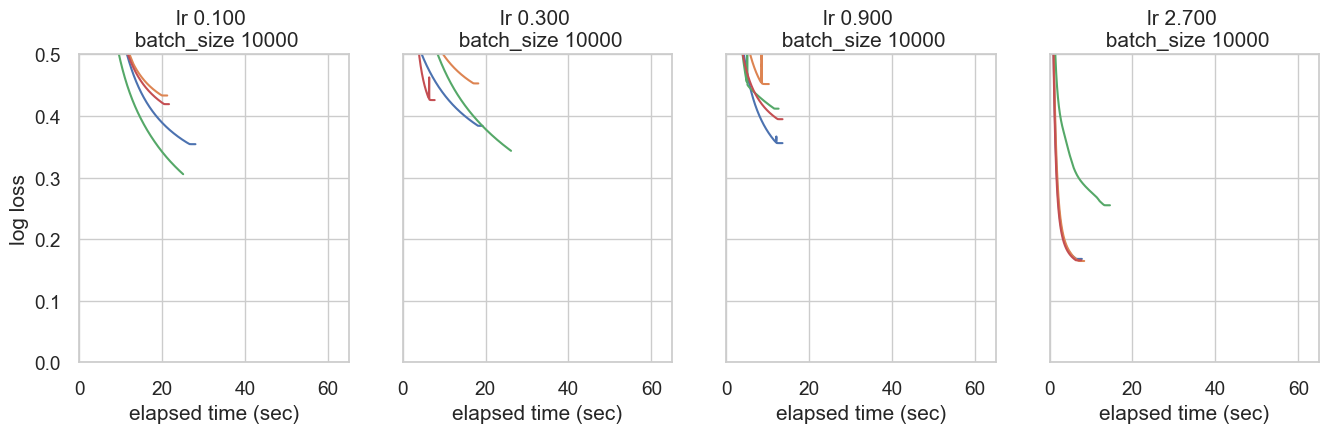

In [67]:
pretty_plot_loss_curve_vs_x(mlp_list_by_lr_10000, x='elapsed_time_sec', xlim_max=65, ylim_max=0.5);


## Reproduce Figure 2 step 2: Try with batch_size = 500 (each batch sees ~5% of the dataset)

We expect each separate "run" will take between 1-3 minutes.

We want you to try at least 2 runs at each of 4 learning rates.

So this block may take ~10-20 minutes to run.

In [64]:
batch_size = 500

max_iter_per_run = 2000 # Don't touch. Has been set so wallclock times are comparable.

mlp_list_by_lr_500 = dict()
for lr in lr_list:
    mlp_list_by_lr_500[lr] = list()
    for run_id, random_state in enumerate(range(n_runs)):
        start_time_sec = time.time()
        mlp = MLPClassifier(
            hidden_layer_sizes=layer_sizes,
            activation='relu',
            alpha=0.0001,
            random_state=random_state, # controls random init of weights
            max_iter=max_iter_per_run,
            solver='sgd',
            batch_size=batch_size,
            learning_rate='adaptive', learning_rate_init=lr, momentum=0.0,
            tol=1e-5,
            n_iter_no_change=50,
            )

        with warnings.catch_warnings(record=True) as warn_list:
            mlp.fit(x_tr_N2, y_tr_N)
        mlp.elapsed_time_sec_ = time.time() - start_time_sec
        mlp.n_epoch_ = len(mlp.loss_curve_)
        mlp.did_converge = True if len(warn_list) == 0 else False

        # Add to the list
        mlp_list_by_lr_500[lr].append(mlp)
        
        # Pretty print summary of this run
        print('finished run %2d/%d after %5.1f sec | %13s after %4d iter | tr loss % .3f | lr = %.3f' % (
            run_id + 1, n_runs,
            mlp.elapsed_time_sec_,
            'yes converged' if mlp.did_converge else 'NOT converged',
            mlp.n_epoch_,
            mlp.loss_ / np.log(2.0),
            lr))

finished run  1/4 after  10.7 sec | yes converged after 1663 iter | tr loss  0.282 | lr = 0.100
finished run  2/4 after  14.0 sec | NOT converged after 2000 iter | tr loss  0.307 | lr = 0.100
finished run  3/4 after  12.5 sec | yes converged after 1921 iter | tr loss  0.145 | lr = 0.100
finished run  4/4 after  10.5 sec | yes converged after 1849 iter | tr loss  0.354 | lr = 0.100
finished run  1/4 after  12.6 sec | NOT converged after 2000 iter | tr loss  0.278 | lr = 0.300
finished run  2/4 after  13.3 sec | NOT converged after 2000 iter | tr loss  0.358 | lr = 0.300
finished run  3/4 after  11.3 sec | yes converged after 1757 iter | tr loss  0.144 | lr = 0.300
finished run  4/4 after   9.5 sec | yes converged after 1570 iter | tr loss  0.354 | lr = 0.300
finished run  1/4 after  12.8 sec | NOT converged after 2000 iter | tr loss  0.251 | lr = 0.900
finished run  2/4 after  14.8 sec | NOT converged after 2000 iter | tr loss  0.243 | lr = 0.900
finished run  3/4 after   9.9 sec | yes 

### Plot loss trace versus elapsed time

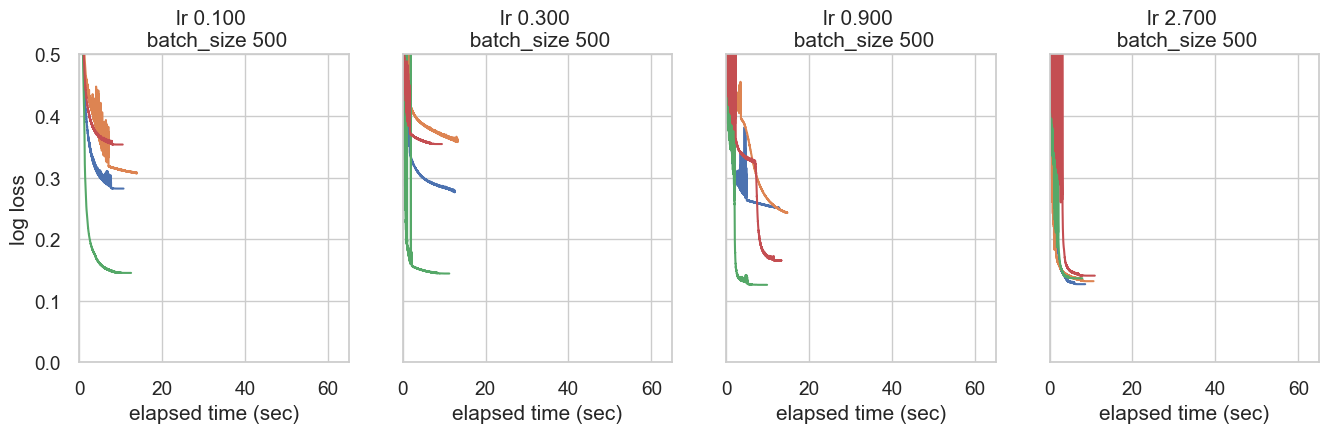

In [65]:
pretty_plot_loss_curve_vs_x(mlp_list_by_lr_500, x='elapsed_time_sec', xlim_max=65, ylim_max=0.5);


## Reproduce Figure 2c: Try with batch_size = 25 (tiny! each batch sees ~0.2% of the dataset)

We expect each separate "run" will take between 1-3 minutes.

We want you to try at least 2 runs at each of 4 learning rates.

So this block may take ~10-20 minutes to run.

In [68]:
batch_size = 25

max_iter_per_run = 500 # Don't touch. Has been set so wallclock times are comparable.

mlp_list_by_lr_25 = dict()
for lr in lr_list:
    mlp_list_by_lr_25[lr] = list()
    for run_id, random_state in enumerate(range(n_runs)):
        start_time_sec = time.time()
        mlp = MLPClassifier(
            hidden_layer_sizes=layer_sizes,
            activation='relu',
            alpha=0.0001,
            random_state=random_state, # controls random init of weights
            max_iter=max_iter_per_run,
            solver='sgd',
            batch_size=batch_size,
            learning_rate='adaptive', learning_rate_init=lr, momentum=0.0,
            tol=1e-5,
            n_iter_no_change=50,
            )

        with warnings.catch_warnings(record=True) as warn_list:
            mlp.fit(x_tr_N2, y_tr_N)
        mlp.elapsed_time_sec_ = time.time() - start_time_sec
        mlp.n_epoch_ = len(mlp.loss_curve_)
        mlp.did_converge = True if len(warn_list) == 0 else False

        # Add to the list
        mlp_list_by_lr_25[lr].append(mlp)
        
        # Pretty print summary of this run
        print('finished run %2d/%d after %5.1f sec | %13s after %4d iter | tr loss % .3f | lr = %.3f' % (
            run_id + 1, n_runs,
            mlp.elapsed_time_sec_,
            'yes converged' if mlp.did_converge else 'NOT converged',
            mlp.n_epoch_,
            mlp.loss_ / np.log(2.0),
            lr))

finished run  1/4 after  24.1 sec | NOT converged after  500 iter | tr loss  0.268 | lr = 0.100
finished run  2/4 after  23.7 sec | NOT converged after  500 iter | tr loss  0.342 | lr = 0.100
finished run  3/4 after  23.8 sec | NOT converged after  500 iter | tr loss  0.139 | lr = 0.100
finished run  4/4 after  23.7 sec | NOT converged after  500 iter | tr loss  0.353 | lr = 0.100
finished run  1/4 after  23.9 sec | NOT converged after  500 iter | tr loss  0.133 | lr = 0.300
finished run  2/4 after  23.9 sec | NOT converged after  500 iter | tr loss  0.346 | lr = 0.300
finished run  3/4 after  23.6 sec | NOT converged after  500 iter | tr loss  0.137 | lr = 0.300
finished run  4/4 after  24.0 sec | NOT converged after  500 iter | tr loss  0.315 | lr = 0.300
finished run  1/4 after  23.7 sec | NOT converged after  500 iter | tr loss  0.127 | lr = 0.900
finished run  2/4 after  23.4 sec | NOT converged after  500 iter | tr loss  0.137 | lr = 0.900
finished run  3/4 after  23.1 sec | NOT 

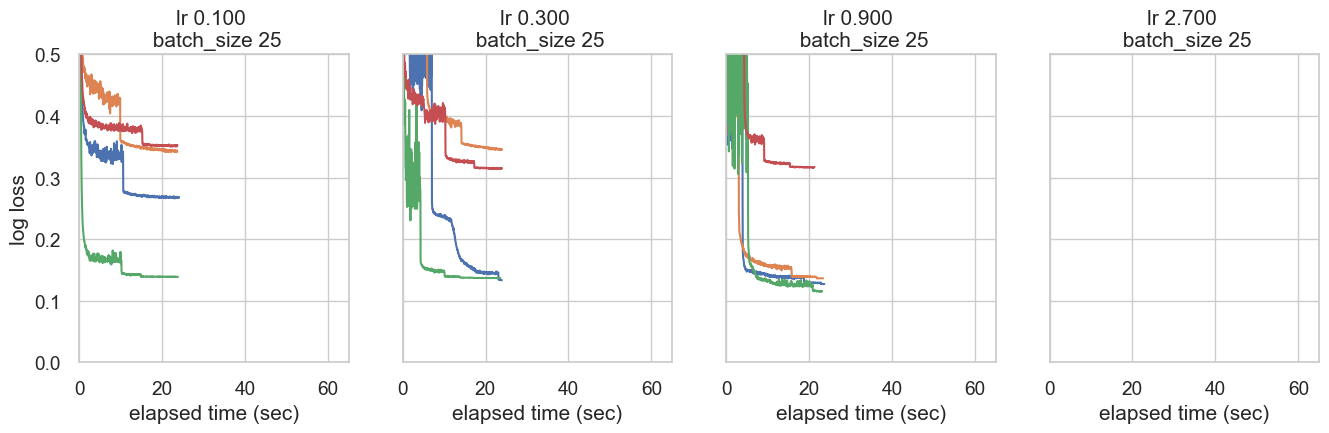

In [69]:
pretty_plot_loss_curve_vs_x(mlp_list_by_lr_25, x='elapsed_time_sec', xlim_max=65, ylim_max=0.5);
